In [73]:
Data <- read.csv(file.path("..","data","training_data.csv"))
Data <- na.omit(Data)
dim(Data)
head(Data)

[1]  708 4872

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


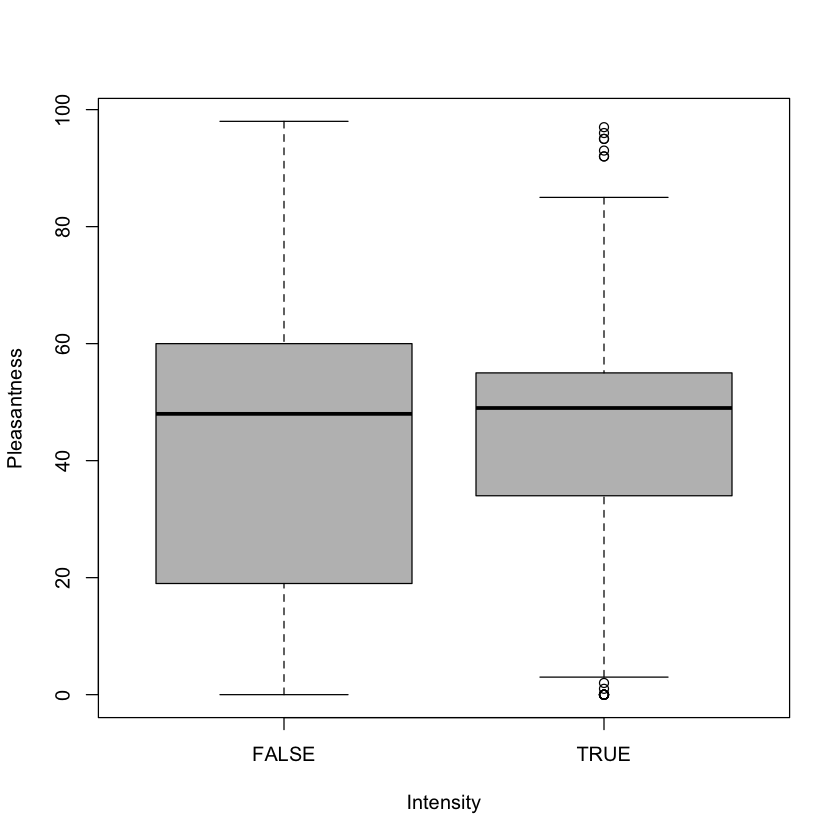

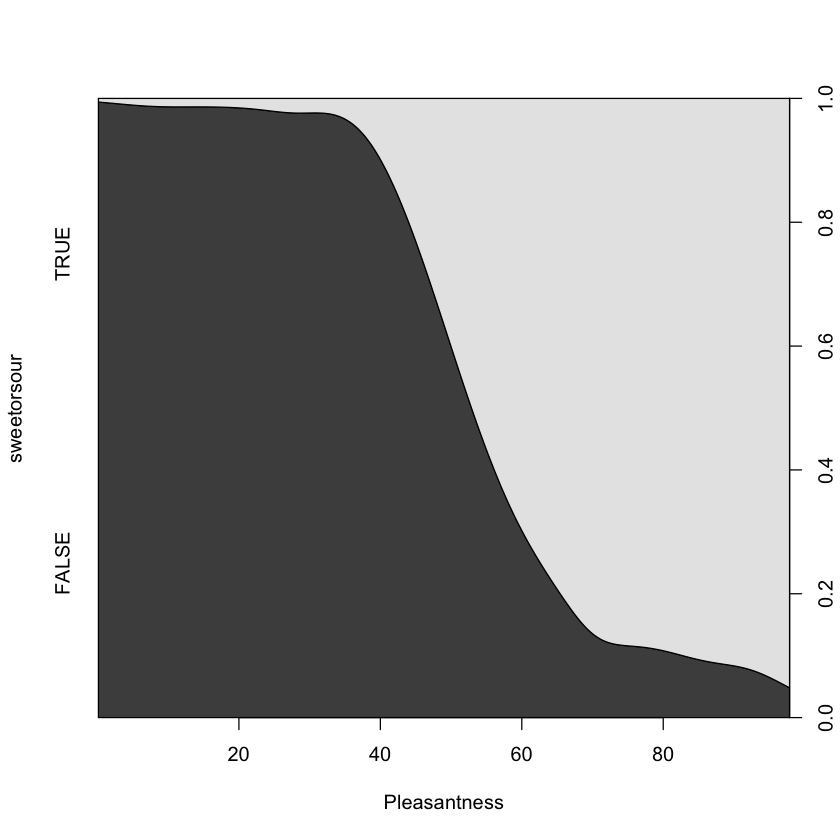

In [74]:
#plot pleasantness en fonction some features (intensity)

plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))


sweetorsour<- factor(Data$SWEETORSOUR)
cdplot( sweetorsour ~ Data$VALENCE.PLEASANTNESS, xlab= 'Pleasantness')


interpretation : 

--> on peut voir que sweet or sour devient true quand pleasantness augmente . 

In [75]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0


In [77]:
library(caret)
#tire des datas : bougeons les collones avec var = 0 and colonnes correlées  .
data <- Data[, which(apply(Data, 2, var)!=0)] 
cormat<- cor(data)
colnames(cormat) <- colnames(data)

highly_corr <- findCorrelation(cormat, 0.9, names = TRUE)
#c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)>0.7),2,any)] #lower.tri bc cormat matrice symetrique.

#data<-data[, c]
data<-na.omit(data)
#data <-data[,-highly_corr]
data <- data[,!names(data) %in% highly_corr]
data <- data[,-3] 

dim(data)
head(data)



[1] 708 852

Intensity,VALENCE.PLEASANTNESS,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
0,45,1.131,0.111,2,2,5.7,3,0.571,0.5,...,0,0,1,0,1,0,1,0,1,0
1,49,1.120,0.053,0,1,5.3,1,0.000,1.0,...,0,0,0,0,0,0,0,0,0,0
1,56,1.110,0.152,1,3,9.4,2,0.000,1.0,...,1,0,1,0,1,1,1,0,1,1
1,7,1.149,0.077,1,2,14.3,0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
0,51,1.123,0.091,0,1,4.5,1,0.000,1.0,...,0,0,0,0,0,0,0,0,0,0
1,21,1.125,0.200,1,2,6.7,1,0.000,1.0,...,0,0,0,0,1,0,1,0,1,0


In [29]:
#Feature Engineering : foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data$VALENCE.PLEASANTNESS ~ . ,  method = "forward", data, nvmax = 200)
regfit.fwd.summary <- summary(regfit.fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“564  linear dependencies found”

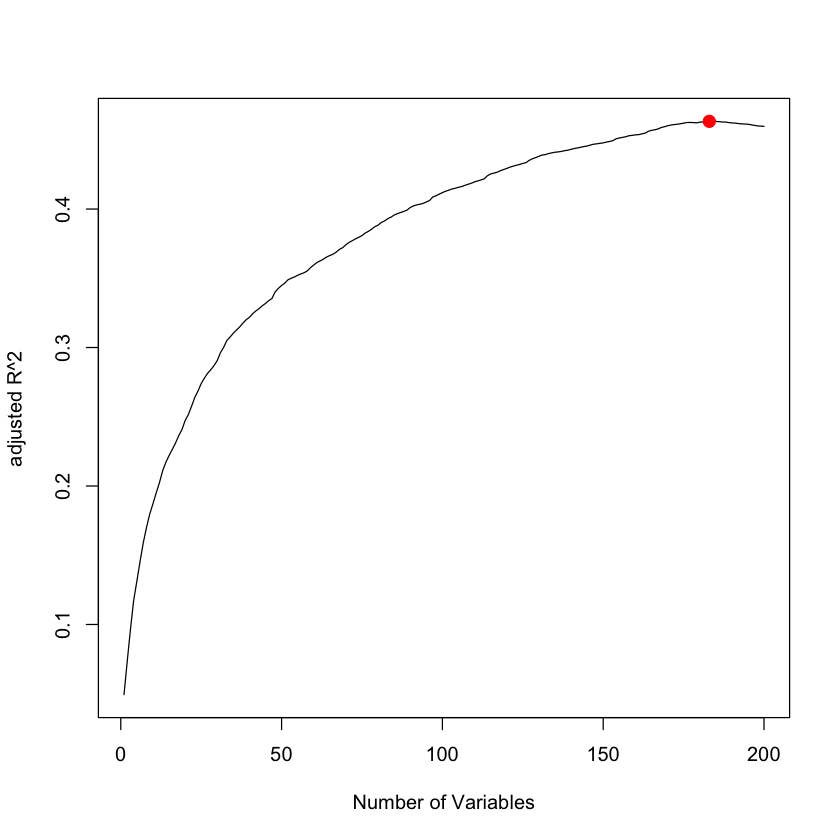

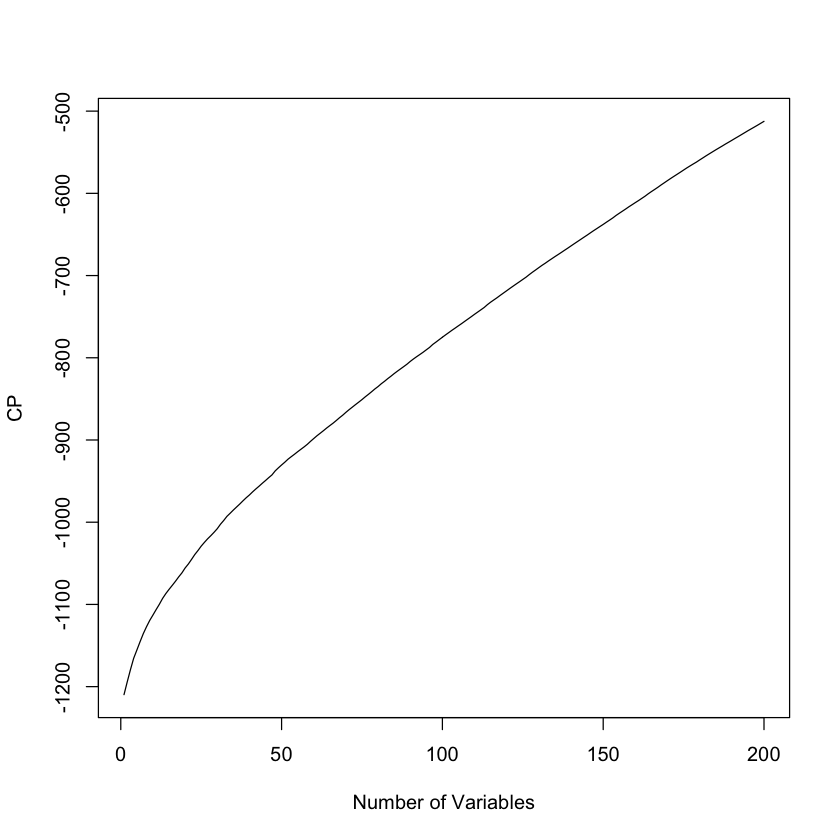

Intensity,VALENCE.PLEASANTNESS,D.Dtr09,PW2,PW3,Psi_i_1d,piPC10,X4A,CIC4,TI1_L,...,DLS_03,DLS_05,DLS_06,LLS_01,LLS_02,CMC.80,Depressant.50,Hypnotic.80,Hypnotic.50,Infective.80
0,45,0,0.601,0.330,0.000,3.807,0.111,0.865,18.510,...,1.00,1.0,1,0.67,1,1,0,1,0,1
1,49,0,0.552,0.308,-0.025,0.000,0.145,0.922,0.000,...,0.83,0.5,1,1.00,1,0,0,0,0,0
1,56,0,0.552,0.318,0.000,5.651,0.135,0.524,26.659,...,1.00,0.5,1,0.67,1,1,0,1,1,1
1,7,0,0.578,0.267,-0.241,0.000,0.000,1.795,-4.593,...,0.83,1.0,1,1.00,1,0,0,0,0,0
0,51,0,0.544,0.322,0.013,0.000,0.145,0.671,0.000,...,0.83,0.5,1,1.00,1,0,0,0,0,0
1,21,0,0.533,0.288,0.001,3.976,0.153,0.692,0.000,...,0.83,1.0,1,0.83,1,1,0,1,0,1


[1] 708 184

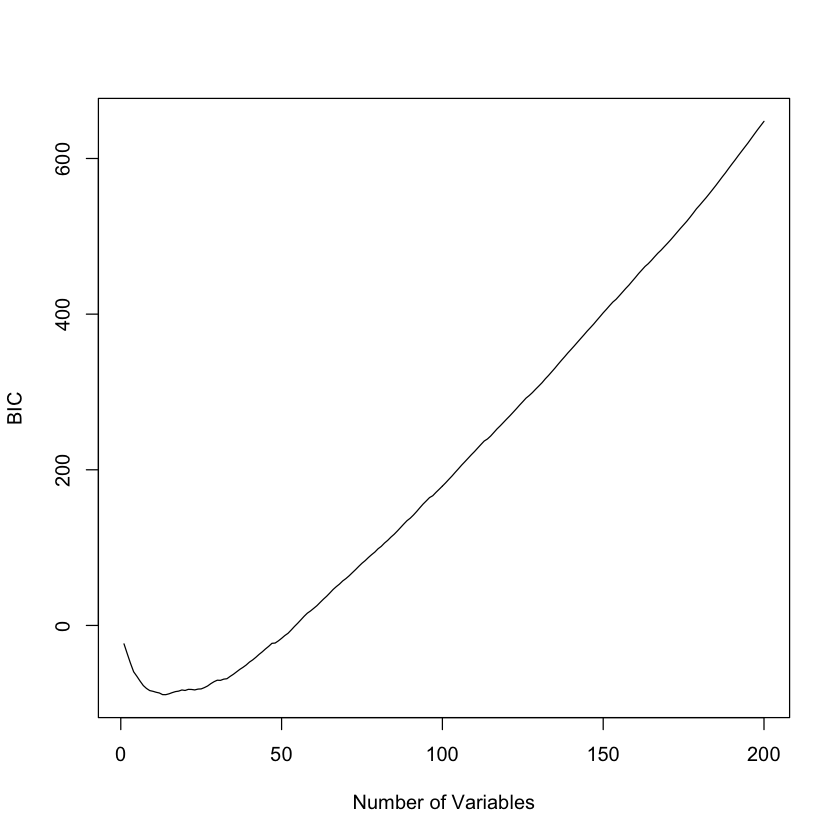

In [34]:

# plot

plot(regfit.fwd.summary$adjr2, type = "l", 
     ,xlab = "Number of Variables", ylab = "adjusted R^2")

adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)


plot(regfit.fwd.summary$cp, type = "l", 
     ,xlab = "Number of Variables", ylab = "CP")
#points(which.min(regfit.fwd.summary$cp), regfit.fwd.summary$adjr2[which.min(regfit.fwd.summary$cp)], col = "red", cex = 2, pch = 20)
plot(regfit.fwd.summary$bic, type = "l", 
     ,xlab = "Number of Variables", ylab = "BIC")





x<- data.frame(
  Adj.R2 = which.max(regfit.fwd.summary$adjr2),
  CP = which.min(regfit.fwd.summary$cp),
  BIC = which.min(regfit.fwd.summary$bic)
)

data_fR <- data[, which(regfit.fwd.summary$which[x$Adj.R2, ]!=0)] #j'ai mis différent de zéro et pas = 
head(data_fR)
data_fCP<-data[, which(regfit.fwd.summary$which[x$CP, ]!=0)]
data_fBIC<-data[, which(regfit.fwd.summary$which[x$BIC, ]!=0)]

dim(data_fR)


--> Gardons les coeff de basé sur adjusted R (CP et BIC enleve trop de predictor)

In [32]:
#PCA with new_data

data.sc <- scale(data_fR[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

ERROR: Error in scale(data_fR[, -1]): objet 'data_fR' introuvable


In [ ]:
biplot(pca, col = c('gray', 'red'), scale = 0)

In [ ]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

In [ ]:
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

In [54]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data_fR), nrow(data_fR)*1/2)
data.train <- data_fR [idx.train,] 
data.test <- data_fR[-idx.train,]







In [55]:
#perform linear multiple regression on the trainig set 
lm <- lm(data.train$VALENCE.PLEASANTNESS ~ ., data = data.train) 
summary(lm)




Call:
lm(formula = data.train$VALENCE.PLEASANTNESS ~ ., data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.399  -7.311   0.000   6.837  32.549 

Coefficients: (3 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -138.8293   485.8821  -0.286 0.775430    
Intensity        -1.4797     2.2617  -0.654 0.513830    
D.Dtr09          -1.0914     0.6570  -1.661 0.098493 .  
PW2             520.1294   303.0218   1.716 0.087865 .  
PW3            -263.2414   133.3813  -1.974 0.050020 .  
Psi_i_1d         13.9371    18.2641   0.763 0.446450    
piPC10            0.3746     3.0048   0.125 0.900944    
X4A            -111.7296    71.6502  -1.559 0.120735    
CIC4             -2.7945    11.3171  -0.247 0.805259    
TI1_L            -0.4625     0.9227  -0.501 0.616789    
SpDiam_L        -42.4672    20.5005  -2.072 0.039795 *  
SpDiam_X         35.1002   194.4589   0.181 0.856970    
Chi_D.Dt         10.1137    12.45

In [33]:
# compare with the test set ??
#test.predict <- predict(lm,data.test)
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(lm, data.train)
quality.of.fit(lm, data.test)



Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”

Residual standard error:  17.3902677347823  R^2 =  0.732831933859324 


Warning message in predict.lm(fit, data):
“prediction from a rank-deficient fit may be misleading”

Residual standard error:  49.7033608828916  R^2 =  -1.21900061974721 


**INTERPRETATION :**

RSE very high for the test set 

So this model is too flexible ? 



In [78]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data), nrow(data)*1/2)
data.train <- data[idx.train,] 
data.test <- data[-idx.train,]

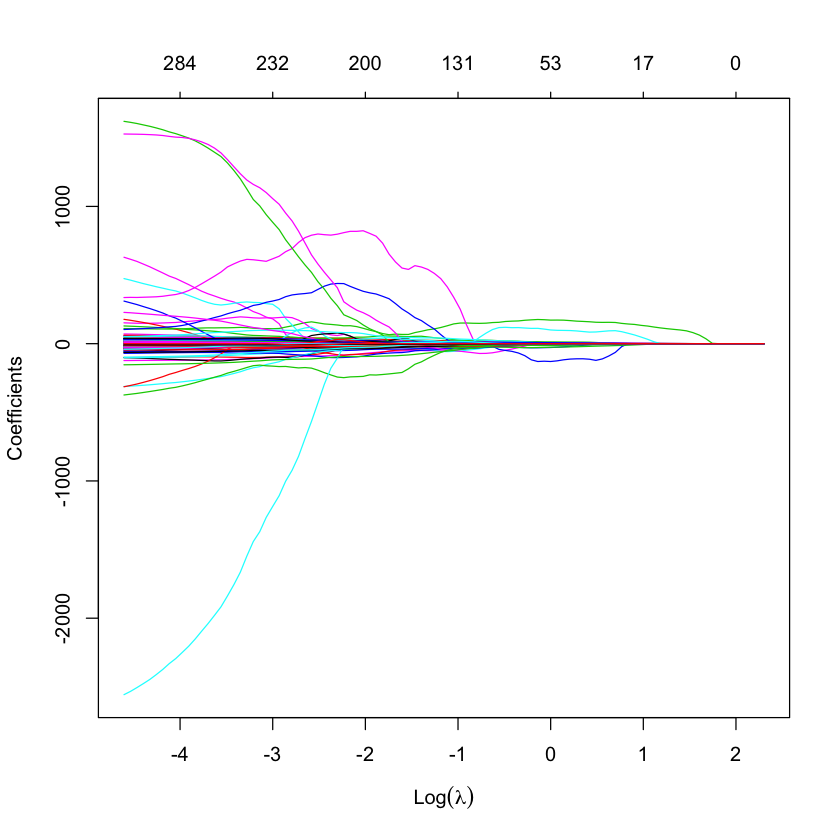

In [94]:
#LASSO L1-REGULARIZATION 

v<-c(colnames(data.train[,-2]))

library(glmnet)
x <- as.matrix(data.train[,v])
y <- data.train$VALENCE.PLEASANTNESS
lasso.mod <- glmnet(x, y, alpha = 1, lambda = 10^seq(1, -2, length = 100))
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

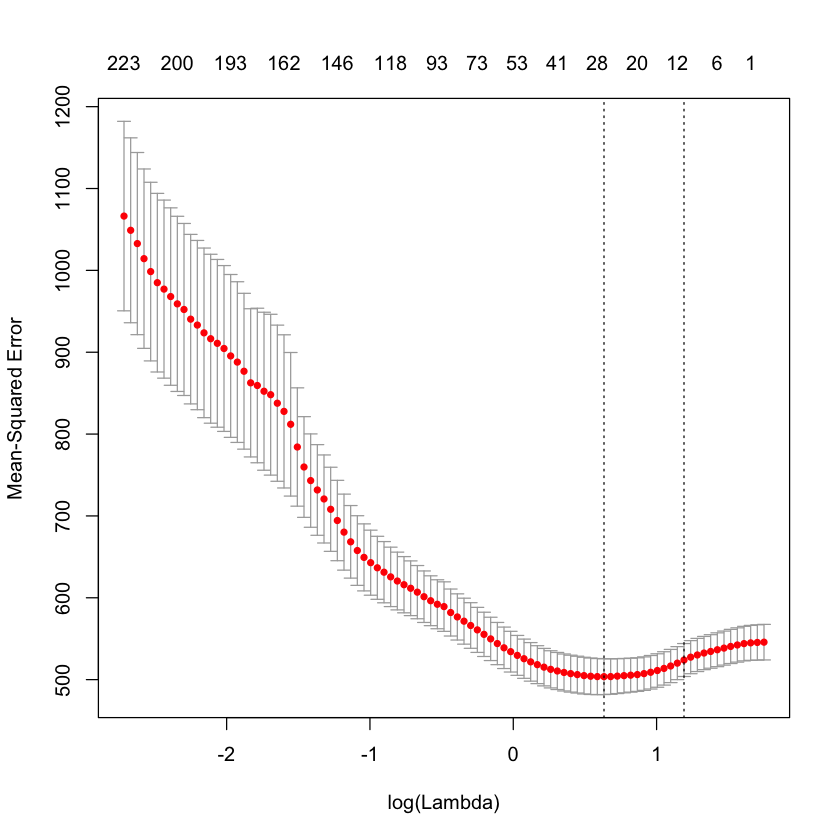

In [95]:
cv.lasso <- cv.glmnet(x, y, alpha = 1, nfold = 10)
plot(cv.lasso)

In [99]:
best.lasso <- glmnet(x, y, alpha = 1, lambda = cv.lasso$lambda.min)
coef(best.lasso)
best.lasso
xtest<- as.matrix(data.test[,v])
bestlam = cv.lasso$lambda.min
lasso_pred = predict(lasso.mod, s = bestlam, newx = xtest)

852 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)     36.669138855
Intensity        .          
Mi               .          
RBF              .          
nDB              .          
nHet             .          
O.               .          
nCIR             .          
RFD              .          
NNRS             .          
nR04             .          
nR06             .          
nR10             .          
ARR              .          
D.Dtr05          .          
D.Dtr07          .          
D.Dtr09          .          
ZM1MulPer        .          
DBI              .          
BLI              .          
SPI              .          
PJI2             .          
ICR              .          
GMTIV            .          
Wap              .          
S3K              .          
PW2              .          
PW3              .          
PW4              .          
MAXDN            .          
Psi_i_0d         .          
Psi_i_1d         .          



Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.min) 

     Df   %Dev Lambda
[1,] 27 0.2177  1.883

The coefficient found are much smaller than the ones with multilinear regression 

In [100]:
rownames(coef(best.lasso))[which(coef(best.lasso) != 0)]
mean((lasso_pred-data.test$VALENCE.PLEASANTNESS)**2)

[1] "(Intercept)"   "CIC5"          "JGI6"          "P_VSA_LogP_5" 
 [5] "P_VSA_MR_2"    "Eig05_EA.dm."  "Eig11_EA.dm."  "Eig08_EA.ri." 
 [9] "RDF120m"       "Mor24m"        "Mor27i"        "G2m"          
[13] "E1e"           "R8m."          "R5p."          "R1s."         
[17] "nRCOSR"        "C.028"         "C.037"         "H.052"        
[21] "O.060"         "N.067"         "CATS2D_04_AL"  "B02.O.S."     
[25] "B06.O.O."      "F04.C.S."      "G.O..S."       "Depressant.50"

[1] 482.3463